In [11]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import io
import csv
outputCSV = "outputData/stocks.csv"

In [12]:
# These can be edited to cover any time period
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,12,31)

In [13]:
# This will download a complete list of companies on the NASDAQ exchange, but we don't need it.  
# Saving for reference tho
# url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
# s = requests.get(url).content
# companies = pd.read_csv(io.StringIO(s.decode('utf-8')))
# companies

In [14]:
# This extracts the symbols from the list above.  also not needed
# Symbols = companies['Symbol'].tolist()

# our stocks to track.  

symbols = ['FDX', 'UPS','AMZN', 'WMT', 'Ebay','TSLA','TM','LUV','DAL','TWTR','FB']

In [15]:
# create empty dataframe
stockFinal = pd.DataFrame()

# iterate over each symbol
for ticker in symbols:  
    
    # print the symbol which is being downloaded
    print( str(symbols.index(ticker)) + str(' : ') + ticker, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        stock = yf.download(ticker, start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=ticker
            stockFinal = stockFinal.append(stock,sort=False)
    except Exception:
        None
stockFinal

0 : FDX,1 : UPS,2 : AMZN,3 : WMT,4 : Ebay,5 : TSLA,6 : TM,7 : LUV,8 : DAL,9 : TWTR,10 : FB,

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2019-01-02,158.520004,163.380005,157.570007,163.190002,158.252838,2125700,FDX
2019-01-03,161.789993,163.070007,156.960007,157.190002,152.434372,3033300,FDX
2019-01-04,160.199997,164.979996,159.500000,164.429993,159.455338,2938600,FDX
2019-01-07,164.889999,166.850006,162.149994,166.729996,161.685776,2989400,FDX
2019-01-08,168.699997,169.419998,165.309998,167.020004,161.966980,2610700,FDX
...,...,...,...,...,...,...,...
2020-12-23,266.890015,272.170013,266.230011,268.109985,268.109985,14329000,FB
2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000,FB
2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700,FB


In [16]:
stockFinal.head(10)

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2019-01-02,158.520004,163.380005,157.570007,163.190002,158.252838,2125700,FDX
2019-01-03,161.789993,163.070007,156.960007,157.190002,152.434372,3033300,FDX
2019-01-04,160.199997,164.979996,159.500000,164.429993,159.455338,2938600,FDX
2019-01-07,164.889999,166.850006,162.149994,166.729996,161.685776,2989400,FDX
2019-01-08,168.699997,169.419998,165.309998,167.020004,161.966980,2610700,FDX
2019-01-09,167.649994,171.220001,167.100006,170.589996,165.428955,2750900,FDX
2019-01-10,169.070007,170.619995,167.929993,170.119995,164.973190,1958500,FDX
2019-01-11,169.490005,171.139999,167.199997,170.990005,165.816879,2836400,FDX
2019-01-14,169.869995,173.100006,169.119995,171.550003,166.359955,2225000,FDX


In [17]:
# delete columns we don't care about, in place
stockFinal.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 1, inplace = True)
# write to CSV (will fail if you don't have the outputData directory)
stockFinal.to_csv(outputCSV, encoding = 'utf-8')

stockFinal

,Close,Volume,Name
Date,,,
2019-01-02,163.190002,2125700,FDX
2019-01-03,157.190002,3033300,FDX
2019-01-04,164.429993,2938600,FDX
2019-01-07,166.729996,2989400,FDX
2019-01-08,167.020004,2610700,FDX
...,...,...,...
2020-12-23,268.109985,14329000,FB
2020-12-24,267.399994,6702000,FB
2020-12-28,277.000000,23299700,FB


<Figure size 432x288 with 0 Axes>

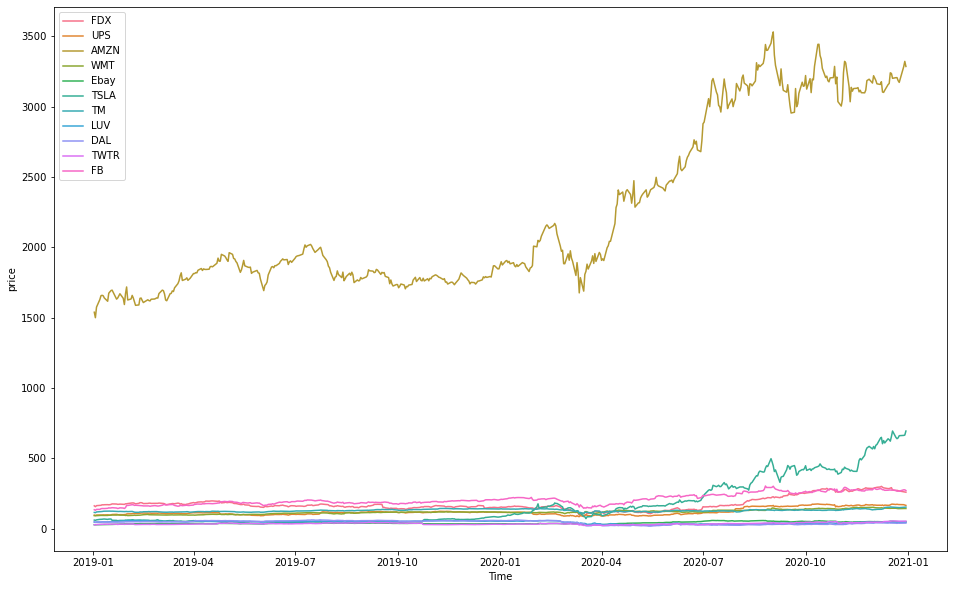

In [21]:
plt.figure()

ticker = stockFinal.Name.unique()
colors = sns.color_palette('husl', n_colors=len(ticker))  # get a number of colors
cmap = dict(zip(ticker, colors))  # zip values to colors

# plot
plt.figure(figsize=(16, 10))
sns.lineplot(x='Date', y='Close', hue='Name', data=stockFinal, palette=cmap)

# We need to call .legend() to show the legend.
plt.legend()
# Give the axes labels
plt.ylabel('price')
plt.xlabel('Time')
plt.show()